# Welcome to our logistics analysis

In [22]:
# load libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset
logistics_data = pd.read_csv('./data/logistic_data.csv')

## Business Understanding

The aim of this analysis is to try to predict how many people we will need for a services that we will be offering to the customers. 


* Problem and Goal Definition: the problem and the goal of the analysis
* Data preparation: Where will we get the dataset, who will give us access to it. 
* Data Understading:  Through the help of explorative data analysis techniques
* Data Pre-processing: treat missing values, numerical and non-numerical data as well as scaling method. 
* Data Modelling: The use of the most powerful models available that suit best to the dataset
* Data Evaluation:  After modelling, which models best perform in the dataset. 

## Data Understanding 

In [3]:
logistics_data.head()

,AuftragKey,BelDatum,BelLandKey,2 digit PLZ,EntLandKey,2 digit Ent PLZ,AuftragartKey,Kurzform,VerkehrKey,Traffic,...,MA,Kabotage,Sales Region,Stamm- Zielkunde 2016,First Tour,Customer Revenue,Frachtaufwand,Lane ID,Customer Lane ID,Transport / Sonstiger Auftrag
0,11214413,43160,H,12,DE,07,NaN,CEE SkHCz Ex DEnBeNL,CEE,CEE,...,KIDO,False,NaN,Not defined,Yes,NaN,NaN,H12-DE,73462-H12-DE07,Transport
1,11213241,43160,I,59,S,43,NaN,SCA-S1,SCA6,SCA(SE)-IT,...,ZOIV,False,NaN,Not defined,Yes,NaN,NaN,I59-S,78072-I59-S43,Transport
2,11213555,43160,I,57,AT,87,NaN,A-I4,D-I3,AT-IT,...,LORO,False,Central,Stammkunde,Yes,NaN,NaN,I57-AT,8561-I57-AT87,Transport
3,11213656,43160,B,99,I,54,NaN,BEN-I1,D-I4,BEN-IT,...,JUAN,False,NaN,Not defined,Yes,NaN,NaN,B99-I,110340-B99-I54,Transport
4,11213963,43160,S,41,I,23,NaN,SCA-S4,SCA2,SCA(NO)-IT,...,PIKA,False,NaN,Not defined,Yes,NaN,NaN,S41-I,51427-S41-I23,Transport


In [4]:
logistics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37522 entries, 0 to 37521
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AuftragKey                     37522 non-null  int64  
 1   BelDatum                       37522 non-null  int64  
 2   BelLandKey                     37522 non-null  object 
 3   2 digit PLZ                    37522 non-null  object 
 4   EntLandKey                     37522 non-null  object 
 5   2 digit Ent PLZ                37522 non-null  object 
 6   AuftragartKey                  3659 non-null   object 
 7   Kurzform                       37522 non-null  object 
 8   VerkehrKey                     37522 non-null  object 
 9   Traffic                        37522 non-null  object 
 10  DivisionKey                    37522 non-null  object 
 11  DisponentKey                   37429 non-null  object 
 12  Vorname                        37429 non-null 

In [5]:
logistics_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AuftragKey,37522.0,1.123258e+07,11792.991887,11167367.0,11222570.25,11232607.5,1.124267e+07,11253731.00
BelDatum,37522.0,4.320264e+04,25.591050,43160.0,43179.00,43203.0,4.322400e+04,43259.00
Ertrag,37522.0,1.288955e+03,688.513909,0.0,766.34,1200.0,1.630000e+03,6743.00
Aufwand,37522.0,1.155007e+03,567.137916,0.0,720.00,1070.0,1.500037e+03,5285.57
DB,37522.0,1.339477e+02,328.274687,-1510.0,17.24,100.0,2.620000e+02,3499.00
TourKey,37431.0,5.126520e+07,12187.355517,51226773.0,51254677.50,51265153.0,5.127576e+07,51286257.00
SubfraechterKey,37420.0,8.984069e+04,36978.640761,0.0,74989.00,98465.0,1.179820e+05,132756.00
KMIst,37431.0,5.944364e+02,673.256675,0.0,0.00,491.0,1.027000e+03,17777.00
KMIstLeer,37431.0,5.644249e+01,79.687240,0.0,0.00,20.0,9.500000e+01,1146.00
Kurskey,20609.0,6.251551e+05,3896.938923,607830.0,621805.00,625138.0,6.285390e+05,632089.00


In [6]:
logistics_data.isna().sum()

AuftragKey                           0
BelDatum                             0
BelLandKey                           0
2 digit PLZ                          0
EntLandKey                           0
                                 ...  
Customer Revenue                 37522
Frachtaufwand                    37522
Lane ID                              0
Customer Lane ID                     0
Transport / Sonstiger Auftrag        0
Length: 66, dtype: int64

In [7]:
key_cols = logistics_data.filter(regex='Key').columns
key_cols = [col for col in key_cols]

In [8]:
logistics_data = logistics_data.drop(
    ['AuftragKey',
     'BelLandKey',
     'EntLandKey',
     'AuftragartKey',
     'VerkehrKey',
     'DivisionKey',
     'DisponentKey',
     'TourKey',
     'SubfraechterKey',
     'KundeKey',
     'KonzernKey',
     'Konzern oder Kunde Key'], axis = 1)

In [12]:
logistics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37522 entries, 0 to 37521
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   BelDatum                       37522 non-null  int64  
 1   2 digit PLZ                    37522 non-null  object 
 2   2 digit Ent PLZ                37522 non-null  object 
 3   Kurzform                       37522 non-null  object 
 4   Traffic                        37522 non-null  object 
 5   Vorname                        37429 non-null  object 
 6   Nachname                       37429 non-null  object 
 7   Ertrag                         37522 non-null  float64
 8   Aufwand                        37522 non-null  float64
 9   DB                             37522 non-null  float64
 10  Subfraechter                   34082 non-null  object 
 11  Art                            37431 non-null  object 
 12  KMIst                          37431 non-null 

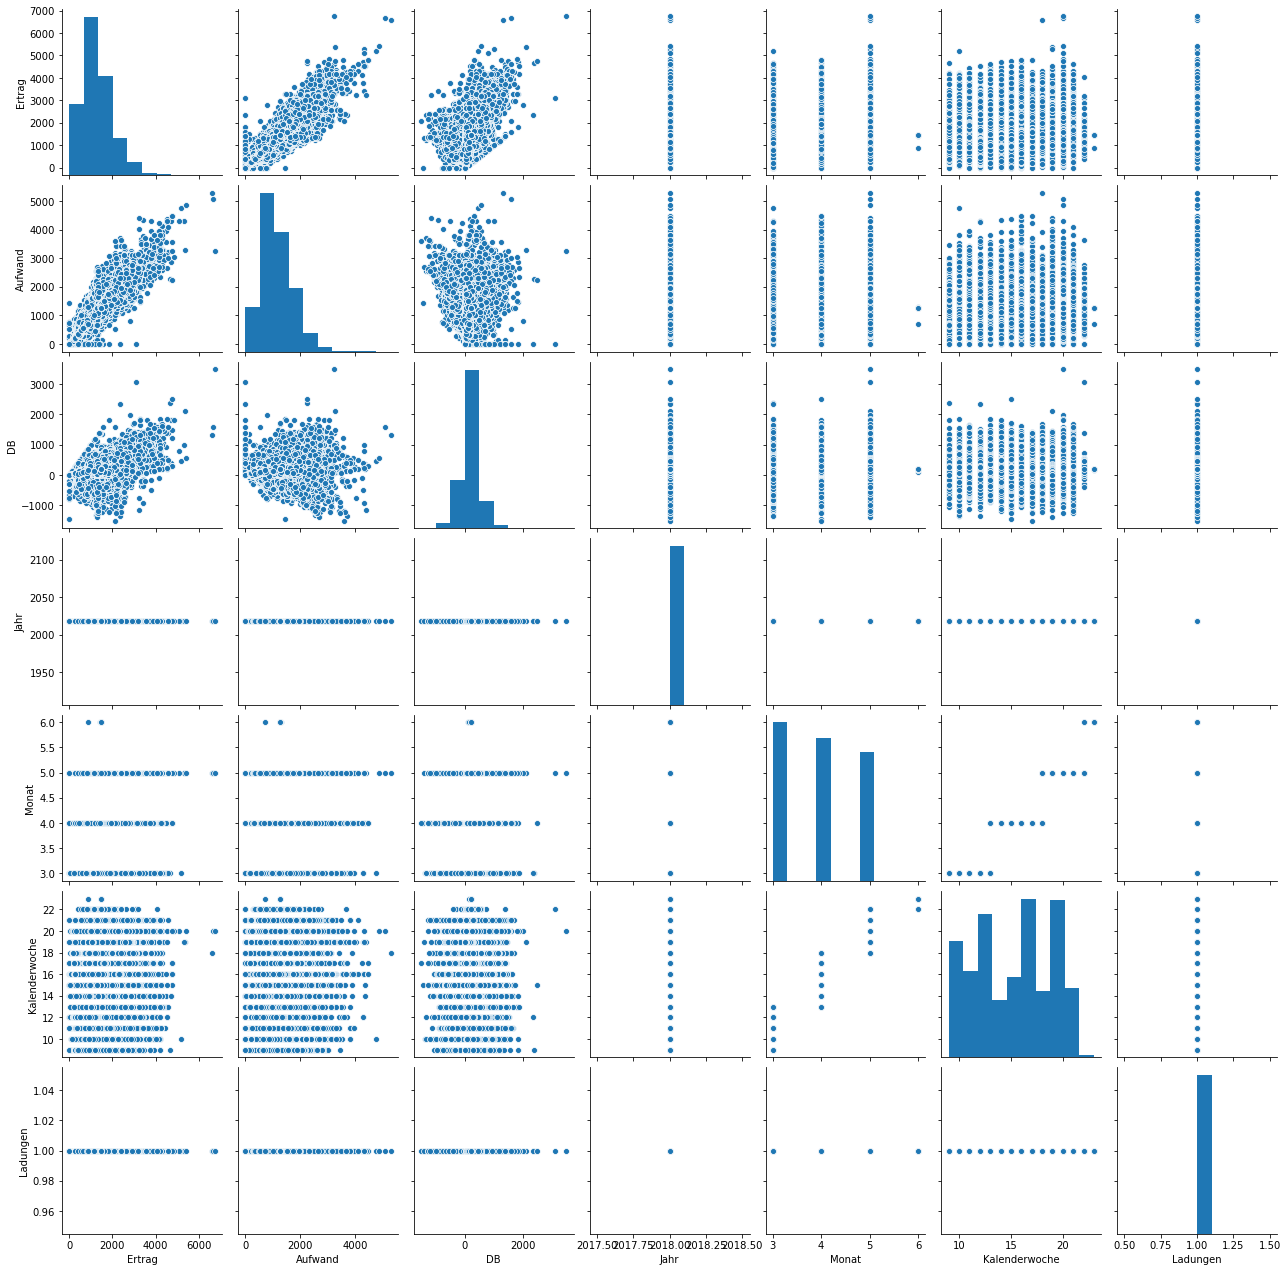

In [14]:
logistics_data = logistics_data[["Ertrag", "Aufwand", "DB", "Jahr", "Monat", "Kalenderwoche", "Quartal", "Ladungen" ]]
sns.pairplot(logistics_data.select_dtypes(include=['number']).dropna())

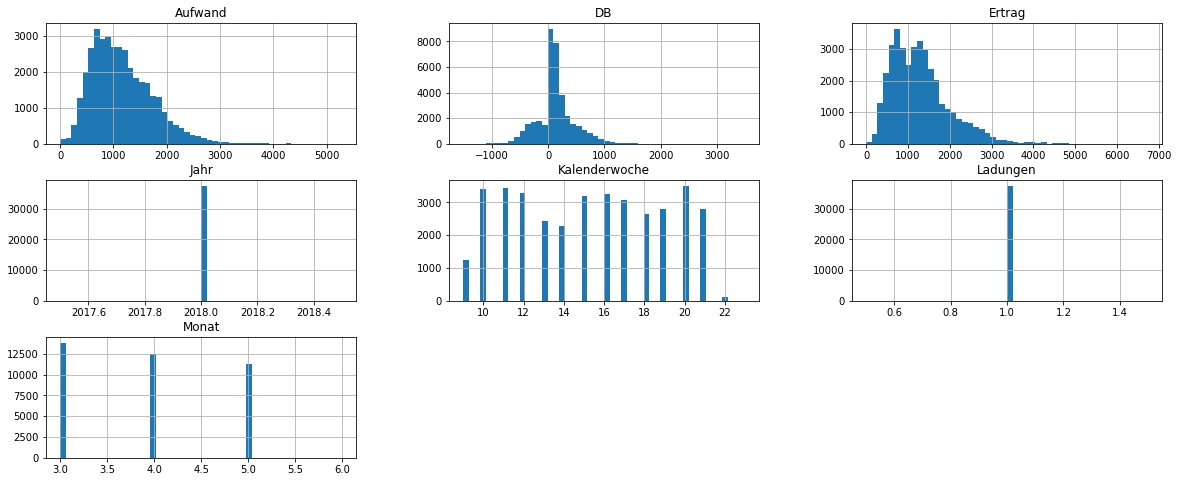

In [23]:
logistics_data.hist(bins=50, figsize=(20,8))
plt.show()